<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar100

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 



In [2]:
(x_trains, y_trains),(x_tests, y_tests) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


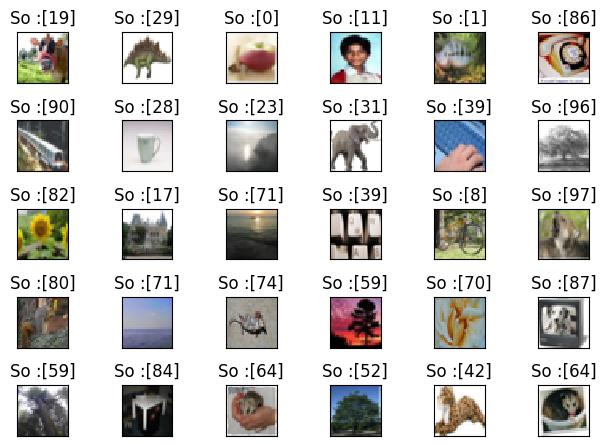

In [3]:
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_trains[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(y_trains[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
x_trains = x_trains.reshape((50000, 32*32*3))
x_trains = x_trains.astype('float32')/255

x_tests = x_tests.reshape((10000, 32*32*3))
x_tests = x_tests.astype('float32')/255

from keras.utils import to_categorical
y_trains = to_categorical(y_trains, 100)
y_tests = to_categorical(y_tests, 100)

In [5]:
from keras import Sequential
from keras.layers import Dense 

In [6]:
model = Sequential()
model.add(Dense(2000, activation = 'relu', input_shape= (32*32*3,)))
model.add(Dense(4000, activation= 'relu'))
model.add(Dense(2000, activation = 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dense_1 (Dense)             (None, 4000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 2000)              8002000   
                                                                 
 dense_3 (Dense)             (None, 100)               200100    
                                                                 
Total params: 22,352,100
Trainable params: 22,352,100
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_trains, y_trains,epochs= 20, batch_size= 200)
test_loss, test_acc = model.evaluate(x_tests, y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
250/250 [==============================] - 8s 11ms/step - loss: 4.4432 - accuracy: 0.0426
Epoch 2/20
250/250 [==============================] - 3s 10ms/step - loss: 3.9567 - accuracy: 0.0924
Epoch 3/20
250/250 [==============================] - 3s 10ms/step - loss: 3.7572 - accuracy: 0.1227
Epoch 4/20
250/250 [==============================] - 3s 11ms/step - loss: 3.6104 - accuracy: 0.1498
Epoch 5/20
250/250 [==============================] - 3s 11ms/step - loss: 3.4972 - accuracy: 0.1671
Epoch 6/20
250/250 [==============================] - 3s 10ms/step - loss: 3.3859 - accuracy: 0.1880
Epoch 7/20
250/250 [==============================] - 3s 10ms/step - loss: 3.2898 - accuracy: 0.2035
Epoch 8/20
250/250 [==============================] - 3s 10ms/step - loss: 3.1861 - accuracy: 0.2207
Epoch 9/20
250/250 [==============================] - 3s 10ms/step - loss: 3.0931 - accuracy: 0.2353
Epoch 10/20
250/250 [==============================] - 3s 11ms/step - loss: 2.9819 - accura

In [8]:
model.save('/content/drive/MyDrive/AI/Week_10/cifar100.h5')
